In [1]:
import sys
sys.path.append('../build')

In [2]:
from compugraph import test

test()

CompuGraph Testing Version 0.0.4


In [3]:
from compugraph import dot

dot()

Test BLAS and LAPACK
{{ 19.,  22.},
 { 43.,  50.}}


In [4]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

# train-images-idx3-ubyte.gz: training set images (9912422 bytes)
# train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
# t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
# t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

def load_idx(filepath):
    with gzip.open(filepath, 'rb') as fin:
        idx_data = fin.read()
        idx = 0
        unsigned = idx_data[idx + 2] == 8
        dim = idx_data[idx + 3]
        idx += 4

        dim_shape = []
        for i in range(dim):
            dim_shape.append(int.from_bytes(idx_data[idx:idx+4], 'big', signed=False))
            idx += 4

        if unsigned:
            return np.frombuffer(idx_data[idx:], np.uint8).reshape(dim_shape)
        return None

def select_images():
    if (not os.path.exists('data')):
        os.makedirs('data')
    if (not os.path.exists('data/train-images-idx3-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'data/train-images-idx3-ubyte.gz')
    if (not os.path.exists('data/train-labels-idx1-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'data/train-labels-idx1-ubyte.gz')
    if (not os.path.exists('data/t10k-images-idx3-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 'data/t10k-images-idx3-ubyte.gz')
    if (not os.path.exists('data/t10k-labels-idx1-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 'data/t10k-labels-idx1-ubyte.gz')
    train_images_data = load_idx('data/train-images-idx3-ubyte.gz')
    train_labels_data = load_idx('data/train-labels-idx1-ubyte.gz')
    test_images_data = load_idx('data/t10k-images-idx3-ubyte.gz')
    test_labels_data = load_idx('data/t10k-labels-idx1-ubyte.gz')

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(train_labels_data == n)[0][:]
        images_list.append(train_images_data[idx])
        labels_list.extend(train_labels_data[idx])
    train_images = np.vstack(images_list)
    train_labels = np.vstack(labels_list).reshape(-1)
    train_labels = np.eye(10)[train_labels]

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(test_labels_data == n)[0][:]
        images_list.append(test_images_data[idx])
        labels_list.extend(test_labels_data[idx])
    test_images = np.vstack(images_list)
    test_labels = np.vstack(labels_list).reshape(-1)
    test_labels = np.eye(10)[test_labels]

    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = select_images()

X_train = (train_images.reshape(train_images.shape[0], -1) / 255.0).astype(np.float64)
Y_train = train_labels.astype(np.float32)
X_test = (test_images.reshape(test_images.shape[0], -1) / 255.0).astype(np.float64)
Y_test = test_labels.astype(np.float64)

In [5]:
from compugraph import mlp1
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp1(X_train, Y_train, X_test, Y_test, 10)
results

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)


[{'test_accuracy': 0.9387019230769231,
  'test_loss': 208.14001418226198,
  'train_accuracy': 0.8418636485042735,
  'train_loss': 1464.1314325995395},
 {'test_accuracy': 0.9550280448717948,
  'test_loss': 132.03313269513703,
  'train_accuracy': 0.9462807158119658,
  'train_loss': 1080.569313473525},
 {'test_accuracy': 0.9569310897435898,
  'test_loss': 130.32498710425912,
  'train_accuracy': 0.9587673611111112,
  'train_loss': 852.5314137674343},
 {'test_accuracy': 0.9644431089743589,
  'test_loss': 107.17921664479697,
  'train_accuracy': 0.9652610844017094,
  'train_loss': 698.1102996978888},
 {'test_accuracy': 0.9639423076923077,
  'test_loss': 100.09815247298155,
  'train_accuracy': 0.969284188034188,
  'train_loss': 617.8769471825528},
 {'test_accuracy': 0.9636418269230769,
  'test_loss': 91.93561618103426,
  'train_accuracy': 0.9725727831196581,
  'train_loss': 557.2402082677605},
 {'test_accuracy': 0.9652443910256411,
  'test_loss': 75.06818748630582,
  'train_accuracy': 0.975377

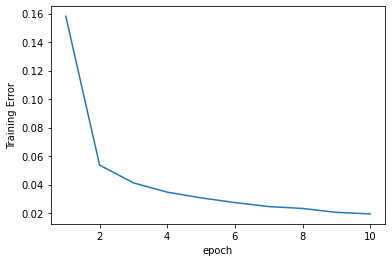

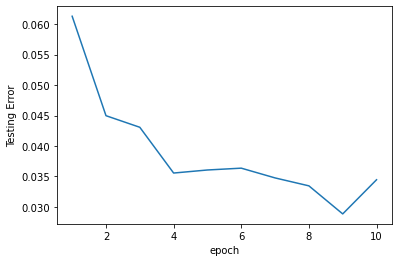

In [6]:
import matplotlib.pyplot as plt

x = list(range(1, len(results) + 1))
train_err = [1 - result['train_accuracy'] for result in results]
test_err = [1 - result['test_accuracy'] for result in results]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, test_err)
plt.xlabel('epoch')
plt.ylabel('Testing Error')
plt.show()

In [7]:
from compugraph import mlp2
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp2(X_train, Y_train, X_test, Y_test, 10)
results

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)


[{'test_accuracy': 0.8807091346153846,
  'test_loss': 365.55831215943533,
  'train_accuracy': 0.5243723290598291,
  'train_loss': 1618.5114112598233},
 {'test_accuracy': 0.9248798076923077,
  'test_loss': 212.53495701620224,
  'train_accuracy': 0.8874532585470085,
  'train_loss': 1483.2359535380256},
 {'test_accuracy': 0.9344951923076923,
  'test_loss': 198.46120556269182,
  'train_accuracy': 0.9274839743589743,
  'train_loss': 1250.2591337944987},
 {'test_accuracy': 0.9110576923076923,
  'test_loss': 123.68590979115409,
  'train_accuracy': 0.9393696581196581,
  'train_loss': 1021.3310391831695},
 {'test_accuracy': 0.9320913461538461,
  'test_loss': 127.87776151845891,
  'train_accuracy': 0.9495025373931624,
  'train_loss': 925.1644912920118},
 {'test_accuracy': 0.9447115384615384,
  'test_loss': 119.46061799021759,
  'train_accuracy': 0.9543603098290598,
  'train_loss': 768.5376790243008},
 {'test_accuracy': 0.94921875,
  'test_loss': 123.49386191644219,
  'train_accuracy': 0.95873397

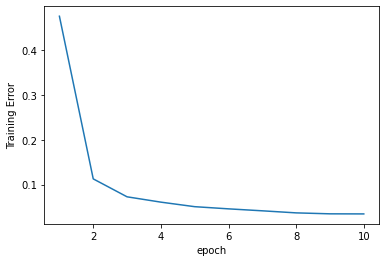

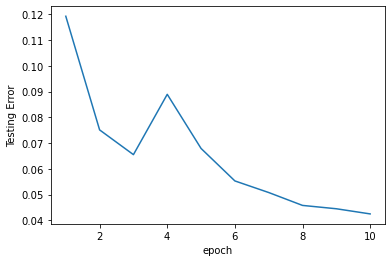

In [8]:
import matplotlib.pyplot as plt

x = list(range(1, len(results) + 1))
train_err = [1 - result['train_accuracy'] for result in results]
test_err = [1 - result['test_accuracy'] for result in results]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, test_err)
plt.xlabel('epoch')
plt.ylabel('Testing Error')
plt.show()